In [1]:
from transformers import pipeline
import  argparse
import pandas as pd
import json
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=3b32c3752698908b3bd32d9bde68e061c3a5054bfe9735d053b2fe136f86408b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [12]:
import wget
import os
filename = []
output_directory = "/content/drive/MyDrive"
urls = ['https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_bloomz.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_chatGPT.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_cohere.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_davinci.jsonl',
        'https://raw.githubusercontent.com/mbzuai-nlp/M4/main/data/arxiv_flant5.jsonl']

for url in urls:
    output_filename = output_directory + '/' + os.path.basename(url) # get the full path of the file
    if os.path.exists(output_filename):
        os.remove(output_filename) # if exist, remove it directly
    filename.append(wget.download(url, out=output_filename))
print(filename)

['/content/drive/MyDrive/arxiv_bloomz.jsonl', '/content/drive/MyDrive/arxiv_chatGPT.jsonl', '/content/drive/MyDrive/arxiv_cohere.jsonl', '/content/drive/MyDrive/arxiv_davinci.jsonl', '/content/drive/MyDrive/arxiv_flant5.jsonl']


In [20]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", model="roberta-base-openai-detector", device=device)

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Test the human abstract and bloomz abstract using roberta-base-openai-detector

In [30]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_bloomz.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)


1, 2, 3, 4, 5, 6, 7, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

['Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real',

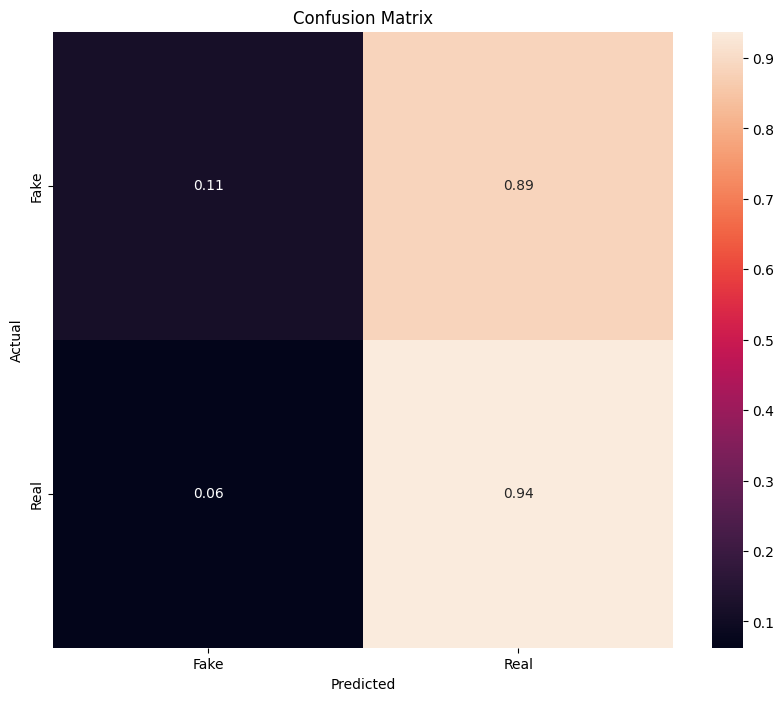

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and bloomz abstract using bloomz-560m-academic-detector

In [33]:
pipe = pipeline("text-classification", model="andreas122001/bloomz-560m-academic-detector", device=device)

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/324 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

In [34]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_bloomz.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)


1, 2, 3, 4, 5, 6, 7, 8, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 22

['Real', 'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real',

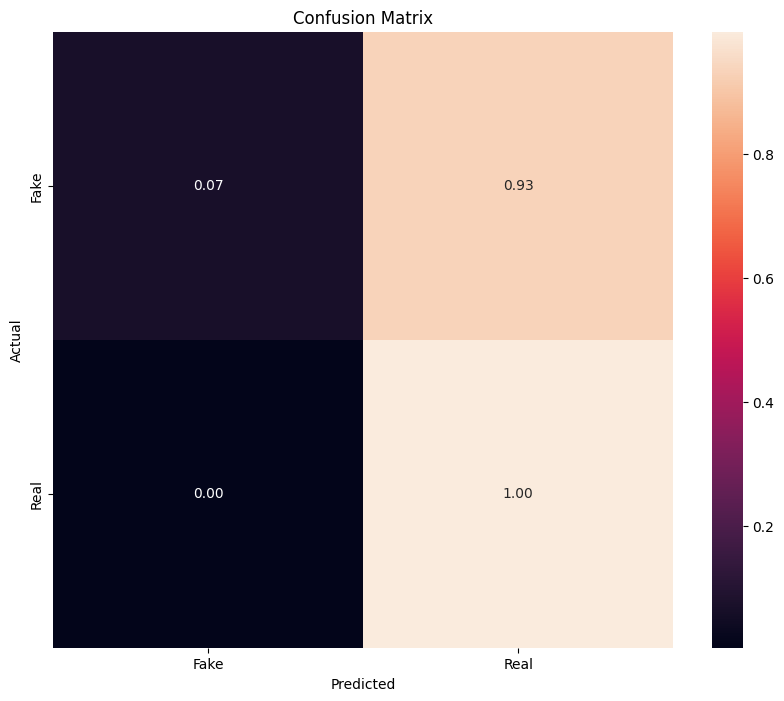

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Human-produced' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Machine-generated' else x for x in prediction_all]
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Test the human abstract and bloomz abstract using bloomz-1b7-academic-detector

In [39]:
pipe = pipeline("text-classification", model="hossamdaoud/bloomz-1b7-academic-detector", device=device)

model.safetensors:   0%|          | 0.00/6.89G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

In [40]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/arxiv_bloomz.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  prediction = json.loads(json.dumps(pipe(df.abstract[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)

prediction_all.extend(prediction_all_human)


1, 2, 3, 4, 5, 6, 

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 2

['Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-pr

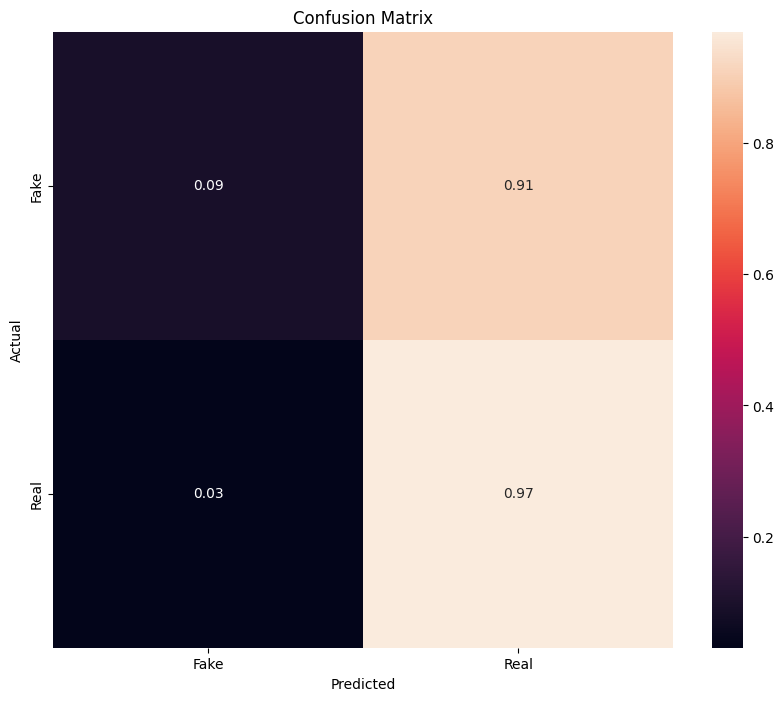

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Human-produced' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Machine-generated' else x for x in prediction_all]
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)